<h1 style="text-align:center">AppleWiseAI</h1>

<h3 style="text-align:center">Predicting prices of Apple stocks using past data.</h3>

1. Date: Date of the trading day.
2. Open: Price at which the stock starts trading when market opens.
3. High: Highest price the stock is traded during the day.
4. Low: Lowest price the stock is traded during the day.
5. Close: Price at which the stock ends when the market closes (Target variable)
6. Adj Close: This is the adjusted close price, caused due to other market factors.
7. Volume: Number of shares traded during the day.

In [49]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("Apple Dataset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


## Data Preprocessing

In [51]:
# calculating the rows and columns in the dataset
rows = df.shape[0]
columns = df.shape[1]

print(f"Number of rows in the dataset: {rows}")
print(f"Number of columns in the dataset: {columns}")

Number of rows in the dataset: 10954
Number of columns in the dataset: 7


In [52]:
# checking the data types of the columns in the dataset
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [53]:
# changing the date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [54]:
# checking the number of null values in the dataset
no_null = df.isnull().sum()

print("Number of missing values in the dataset:")
print(no_null)

Number of missing values in the dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


There are no null values in the dataset. So no techniques have to be followed to fill any possible null values.

## Data Visualization

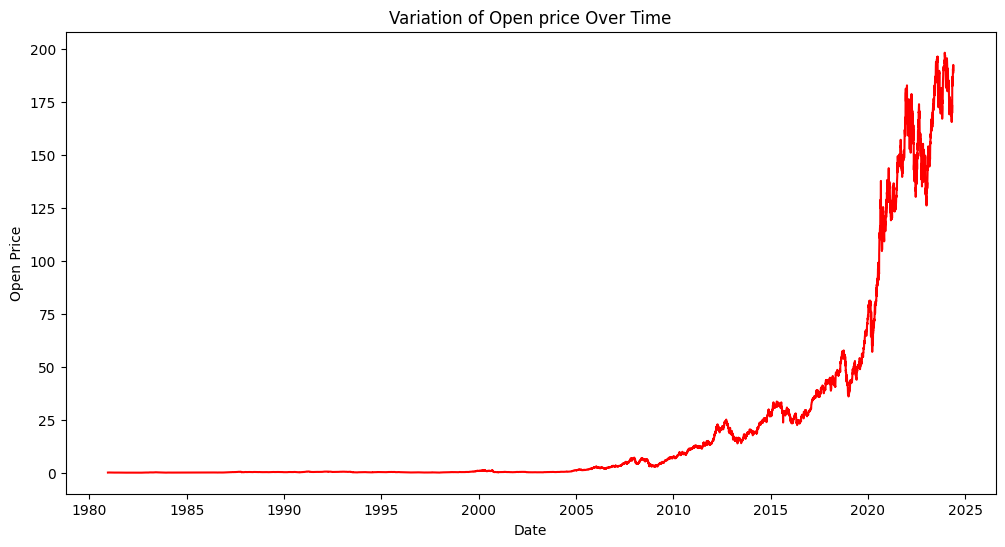

In [55]:
# drawing a plot to show variation of open price over time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Open"], color="red")
plt.title("Variation of Open price Over Time")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

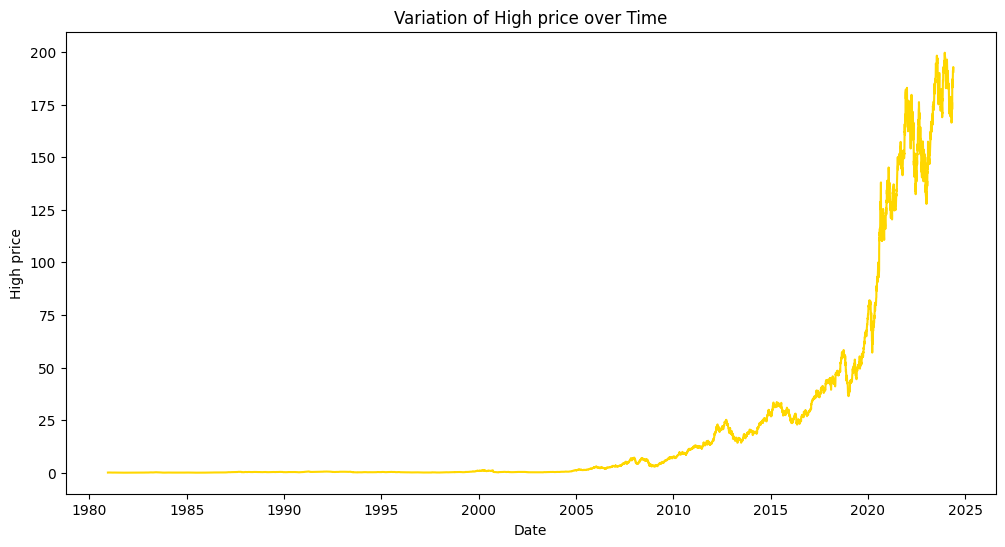

In [56]:
# drawing a plot to show variation of high price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["High"], color="gold")
plt.title("Variation of High price over Time")
plt.xlabel("Date")
plt.ylabel("High price")
plt.show()

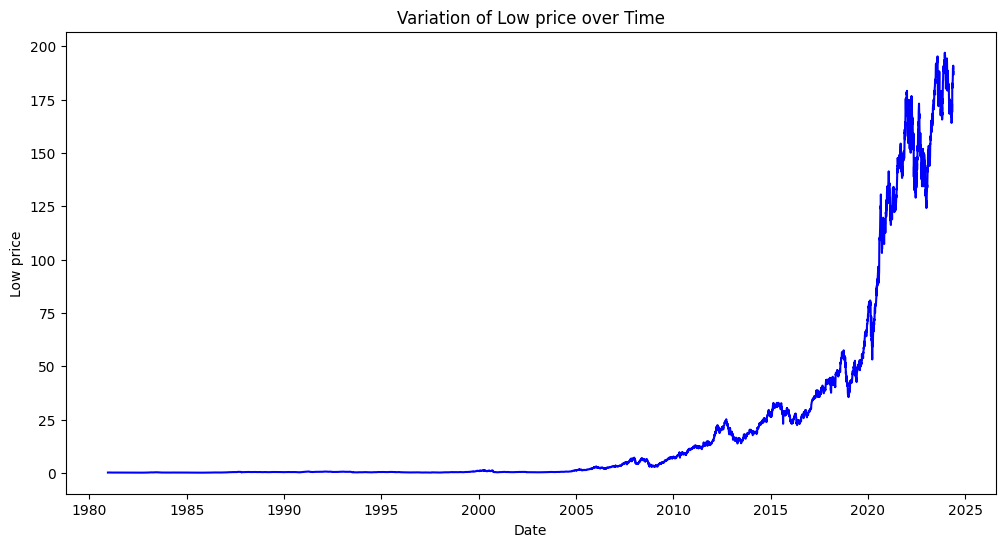

In [57]:
# drawing a plot to show variation of low price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Low"], color="blue")
plt.title("Variation of Low price over Time")
plt.xlabel("Date")
plt.ylabel("Low price")
plt.show()

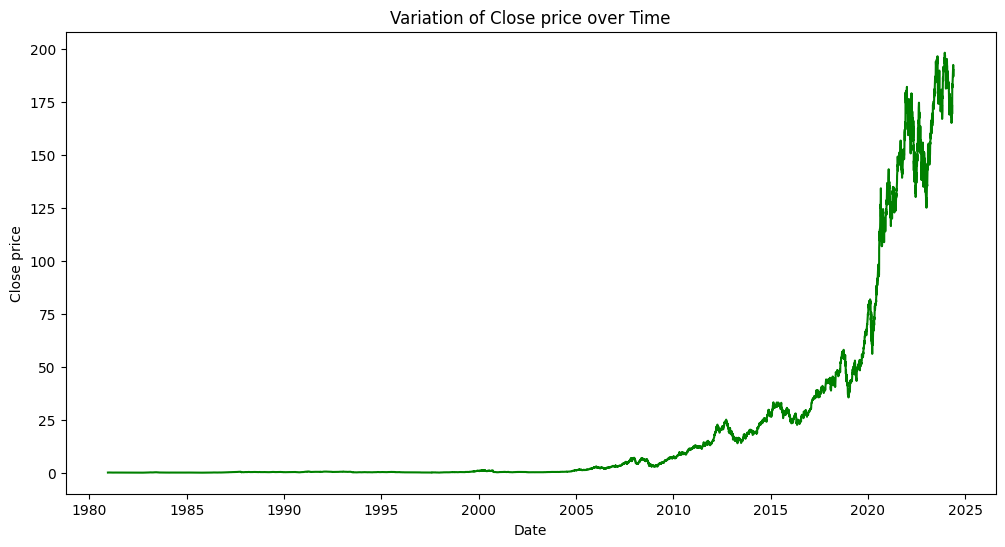

In [58]:
# drawing a plot to show variation of close price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], color="green")
plt.title("Variation of Close price over Time")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.show()

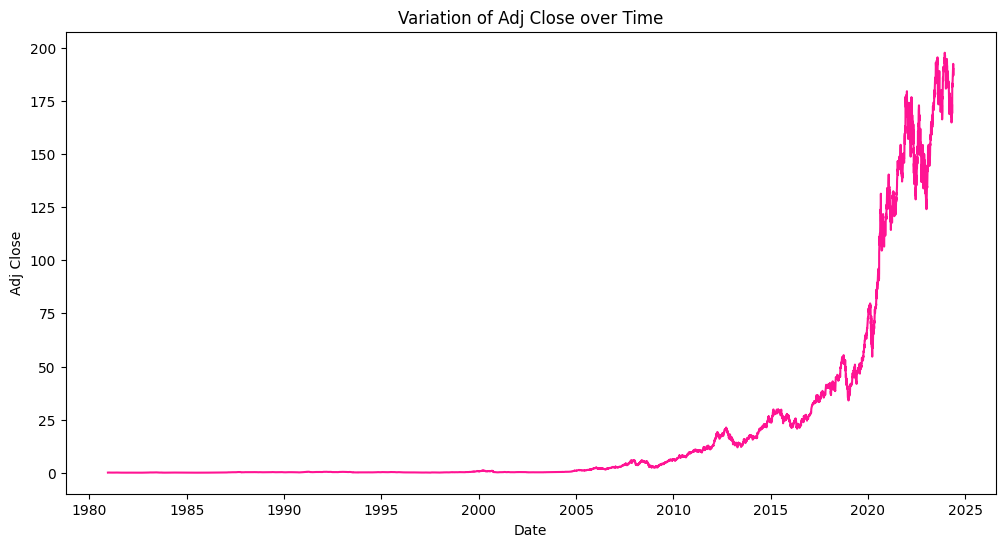

In [59]:
# drawing a plot to show variation of adj close over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Adj Close"], color="deeppink")
plt.title("Variation of Adj Close over Time")  
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

All these graphs follow the same pattern roughly. This shows that the data is genuine and can be used to generate predictions.

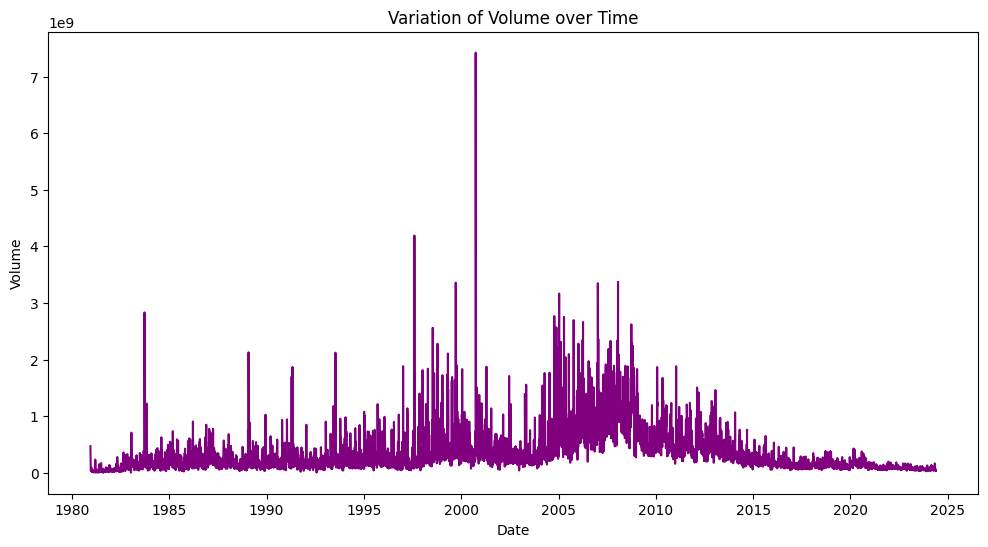

In [60]:
# drawing a plot to show variation of volume over time- shows which periods more stocks have been sold
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Volume"], color="purple")
plt.title("Variation of Volume over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [61]:
# calculating the number of shares sold for each year
df["Year"] = df["Date"].dt.year
shares_sold = df.groupby("Year")["Volume"].sum()
print(shares_sold)

Year
1980      1344851200
1981      8196944000
1982     21365008000
1983     44513011200
1984     41979033600
1985     45492272000
1986     53323222400
1987     59771308800
1988     41292977600
1989     50905825600
1990     44401940800
1991     57347651200
1992     41137913600
1993     56452928000
1994     57155896000
1995     74266539200
1996     53194220800
1997     71963360000
1998    115194195200
1999    137102705600
2000    120301596800
2001     94657796800
2002     77013927200
2003     71230252800
2004    121801668800
2005    182400982400
2006    215698966000
2007    246995985600
2008    285981206000
2009    143253686800
2010    151024927200
2011    124059339600
2012    131964204400
2013    102421569600
2014     63657952400
2015     52264199600
2016     38729911200
2017     27243106000
2018     34156144800
2019     28254942800
2020     39863855600
2021     22812206100
2022     22065504500
2023     14804257200
2024      6133429500
Name: Volume, dtype: int64


In [62]:
share_count_df = pd.DataFrame(shares_sold)
share_count_df.reset_index(inplace=True)
share_count_df

,Year,Volume
0,1980,1344851200
1,1981,8196944000
2,1982,21365008000
3,1983,44513011200
4,1984,41979033600
5,1985,45492272000
6,1986,53323222400
7,1987,59771308800
8,1988,41292977600
9,1989,50905825600


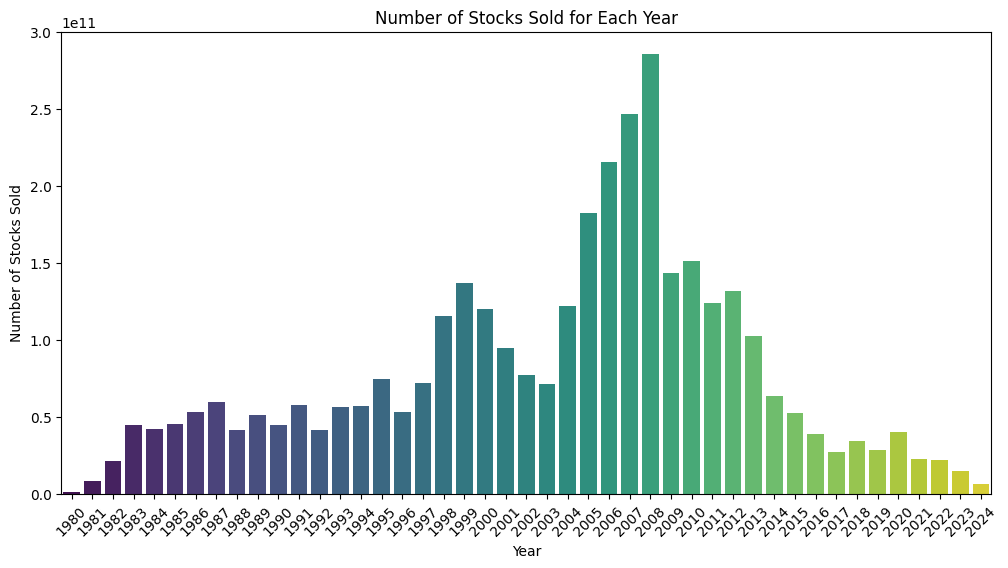

In [63]:
# plotting a graph to see the variation of number of stocks for each year
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Volume", data=share_count_df, palette="viridis")
plt.title("Number of Stocks Sold for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Stocks Sold")
plt.xticks(rotation=45)
plt.show()